In [1]:
'''
Given a csv file with the following format:

OBJECTID,Crop2014,Acres,County,Comments,Source,Modified_B,Date_Data_,Last_Modif,DWR_Standa,GlobalID,Shape_Leng,Shape_Area,_count,_sum,_mean,_median,_stdev,_min,_max,_range,_minority,_majority,_variety,_variance

draw a histogram for every crop, x coordinate is the average eta with range between 1 and 8
y coordinate is the number of fields with eta value fall betweem 1 and 2, 2 and 3, etc for a specific crop. 
'''

'\nGiven a csv file with the following format:\n\nOBJECTID,Crop2014,Acres,County,Comments,Source,Modified_B,Date_Data_,Last_Modif,DWR_Standa,GlobalID,Shape_Leng,Shape_Area,_count,_sum,_mean,_median,_stdev,_min,_max,_range,_minority,_majority,_variety,_variance\n\ndraw a histogram for every crop, x coordinate is the average eta with range between 1 and 8\ny coordinate is the number of fields with eta value fall betweem 1 and 2, 2 and 3, etc for a specific crop. \n'

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
'''
create a dictionary with key representing crop name and value being a list of average eta values for that crop
from the given csv
'''
def create_crop_eta_dict(filename):
    crops = {}
    with open(filename, mode='r') as f:
        #skip the header row
        next(f, None)
        reader = csv.reader(f)
        
        for r in reader:
            crop = r[1]
            avg_eta = float(r[15])
            
            if crop not in crops:
                crops[crop] = []
            crops[crop].append(avg_eta)
    return crops


In [4]:
crops_dict = create_crop_eta_dict("../data/CropCensus_withEta.csv")

In [39]:
'''
function that draws a histogram given a list of eta values and crop name.
It also has an option to save the figure to a file
'''
def draw_hist_by_crop(eta_arr, crop, save_to_file = False):
    plt.title('average eta for ' + crop)
    plt.xlabel('average eta')
    plt.ylabel('number of fields')
    plt.hist(x=np.array(eta_arr, dtype=np.float64), bins=8)
    if save_to_file:
        plt.savefig('../plots/' + crop + '_eta.png')
    plt.show()

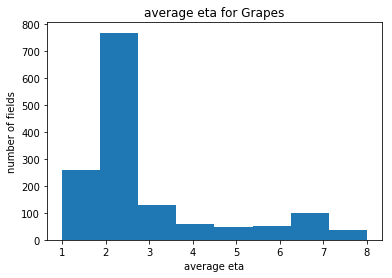

In [40]:
draw_hist_by_crop(crops_dict["Grapes"], "Grapes", save_to_file = True)

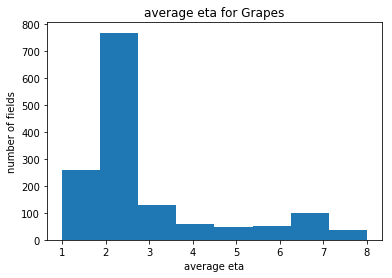

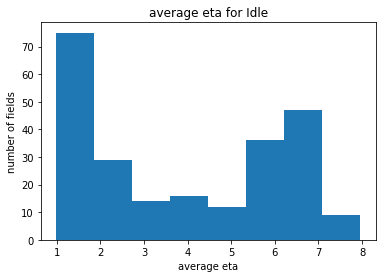

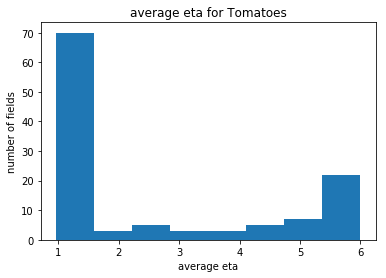

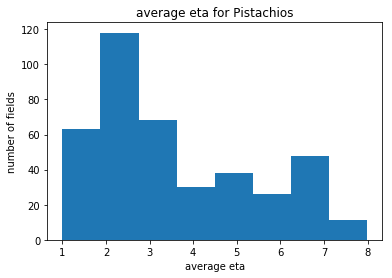

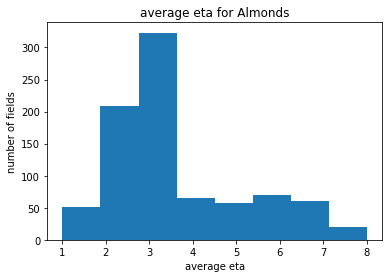

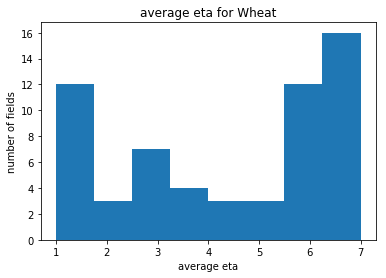

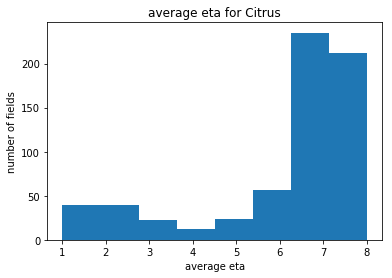

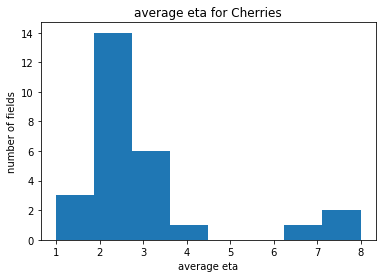

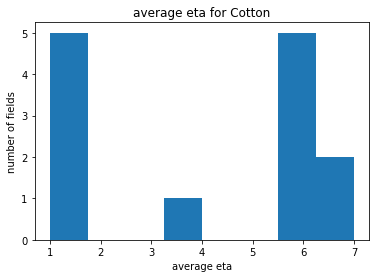

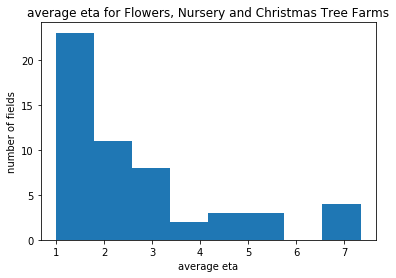

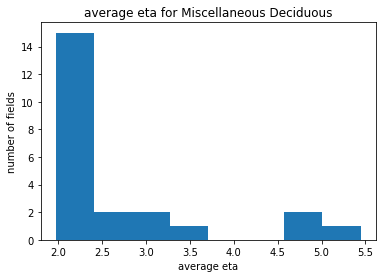

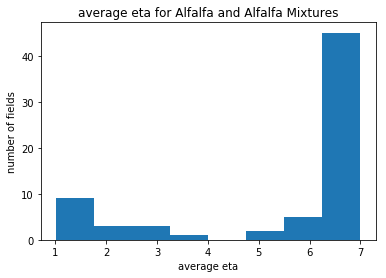

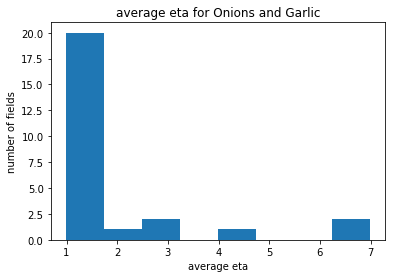

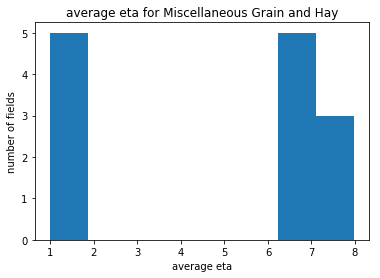

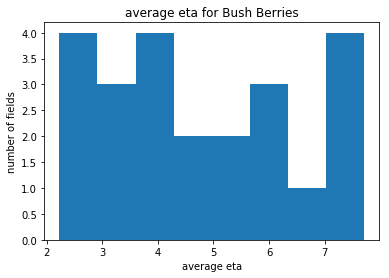

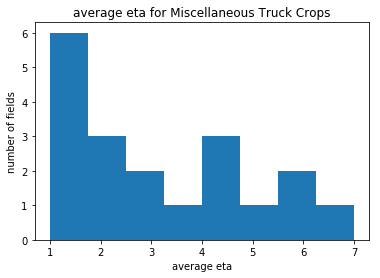

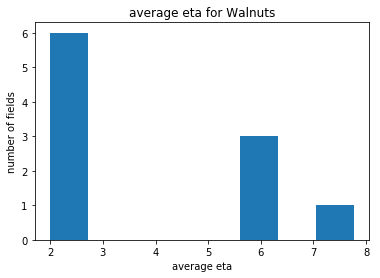

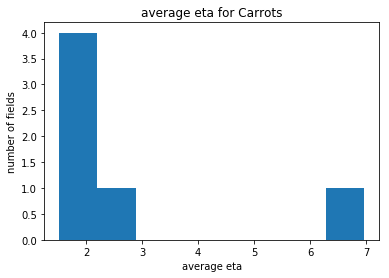

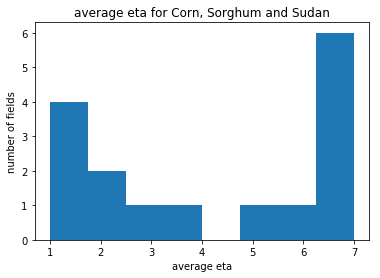

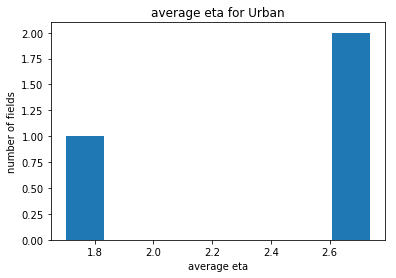

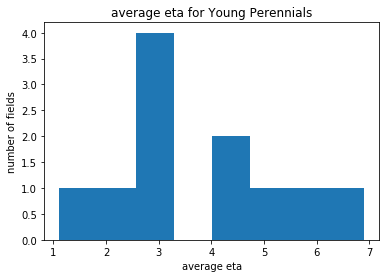

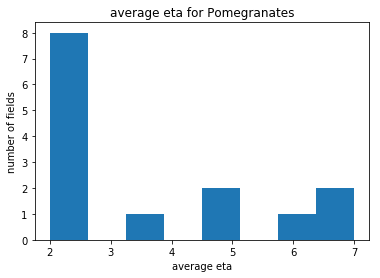

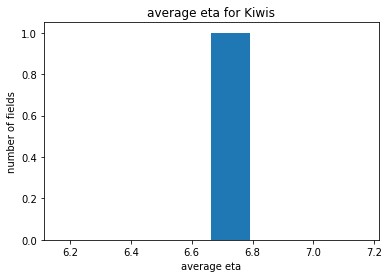

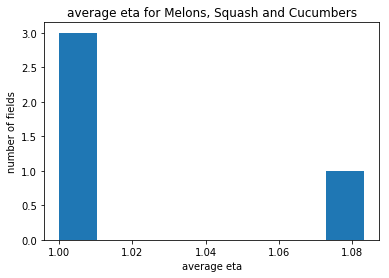

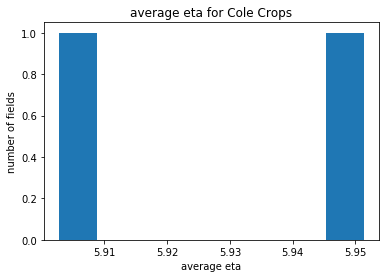

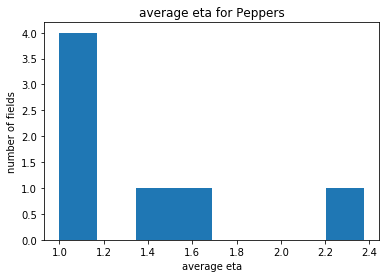

In [41]:
for key, value in crops_dict.items():
    draw_hist_by_crop(value, key, save_to_file = True)

In [ ]:
# compute the standard deviation for mean eta of every crop
for key, value in crops_dict.items():
    print(key+np.std(np.array(value, dtype=np.float64)))